In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

In [2]:
# x from 0 to 30
x = 30 * np.random.random((20, 1))

In [3]:
# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

In [4]:
# create a linear regression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [5]:
# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

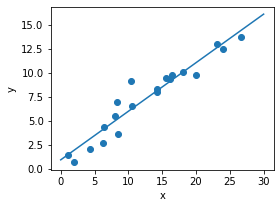

In [6]:
# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

In [7]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(f'DataFrame {filename[:-4]} successfully loaded!')

DataFrame diabetes successfully loaded!


In [8]:
diabetes= pd.read_csv(filepath) 
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


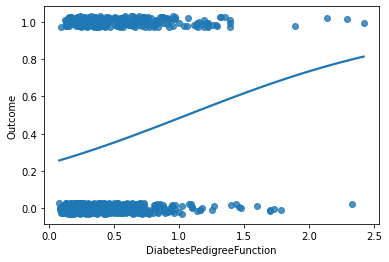

In [9]:
sns_plot=sns.regplot(
    x="DiabetesPedigreeFunction", 
    y = "Outcome", 
    y_jitter = 0.03,
    data = diabetes,
    logistic =True,
    ci = None
)

fig = sns_plot.get_figure()
fig.savefig("output.png",bbox_inches ="tight", 
            pad_inches = 1, 
            transparent = True, 
            facecolor ="w", 
            edgecolor ='w', 
            orientation ='landscape')